# Proof of concept earth engine download code, last edited 23.07 21:20

In [1]:
#Earth engine access authorization, if needed

#import ee
#ee.Authenticate()

In [2]:
%matplotlib inline

In [56]:
import ee
import geemap
import numpy as np
import matplotlib.pyplot as plt
import rasterio

ee.Initialize()

In [57]:
name="blacksea" #filename

In [58]:
#Define the Area Of Interest (coordinates are longtitude and latitude)

dphi=0.1 #latitude dimension of rectangle, deg
dl=0.1 #longtitude dimension, deg
phi=43.213741 #center latitude
l=33.344719 #center longtitude

aoi=ee.Geometry.Rectangle([[l-dl/2, phi-dphi/2],[l+dl/2, phi+dphi/2]])

In [60]:
# Define the date range
start_date = '2023-01-01'
end_date = '2023-01-31'

# Access the Sentinel-2 image collection
sentinel_collection = ee.ImageCollection('COPERNICUS/S2_HARMONIZED') \
    .filterDate(start_date, end_date) \
    .filterBounds(aoi) \
    .sort('CLOUD_COVER') #NOT SURE WHAT THIS DOES!

In [61]:
bands=sentinel_collection.select(['B2','B3','B4']) #selects narrowband RGB

In [62]:
bands.size().getInfo()

6

In [63]:
image=bands.first() #selects the first image of the set, for demonstration purposes

In [64]:
#Haven't tweaked the parameters yet

# Map object creation
Map = geemap.Map(width="800px", height="500px")

# Add image
Map.addLayer(image, {'bands': ['B4', 'B3', 'B2'], 'max': 2000}, 'First Image')

# Add AOI
Map.addLayer(aoi, {
  'color': '00FF00', # Green
  'width': 2  # Outline thickness
}, 'Gela')

Map.centerObject(aoi, 12)
geemap.ee_export_image_to_drive(image,
                                description=name,
                                folder='export',
                                region=aoi,
                                scale=10,
                                maxPixels=1e13) #it's worth playing around with scale and maxPixels

Now there should be a file 'image.tif' in the 'export' folder of google drive. It is assumed next that this file is downloaded and placed in the same file as the notebook (perhaps this step can be skipped if we use Google Colab?)

In [65]:
#Access RGB channeld as np.arrays; keep in mind that the values are in the [0,4000] range
im=rasterio.open("{}.tif".format(name))
B=im.read(1)
G=im.read(2)
R=im.read(3)

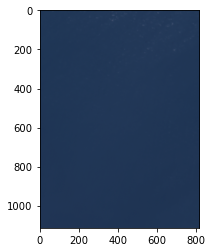

In [66]:
#Display the image
max_value=4000 #see https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/
plt.imshow(np.stack([R,G,B],axis=2)/max_value)